In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('balance-data.csv')
df

,Class.name,Left.weight,Left.distance,Right.weight,Right.distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [5]:
df.shape

(625, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class.name        625 non-null object
Left.weight       625 non-null int64
Left.distance     625 non-null int64
 Right.weight     625 non-null int64
Right.distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 22.0+ KB


In [8]:
df.isnull().sum()

Class.name        0
Left.weight       0
Left.distance     0
 Right.weight     0
Right.distance    0
dtype: int64

In [9]:
df.describe()

,Left.weight,Left.distance,Right.weight,Right.distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [10]:
df.corr()

,Left.weight,Left.distance,Right.weight,Right.distance
Left.weight,1.0,0.0,0.0,0.0
Left.distance,0.0,1.0,0.0,0.0
Right.weight,0.0,0.0,1.0,0.0
Right.distance,0.0,0.0,0.0,1.0


In [11]:
df.columns

Index(['Class.name', 'Left.weight', 'Left.distance', ' Right.weight',
       'Right.distance'],
      dtype='object')

In [12]:
df['Class.name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [118]:
#changing categorical value to numerical value
from sklearn.preprocessing import LabelEncoder
df['Class.name'] = LabelEncoder().fit_transform(df['Class.name'])

In [119]:
df.head()

,Class.name,Left.weight,Left.distance,Right.weight,Right.distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


here in ['class.name']-->0=B,1=L,2=R

# Data Visualization

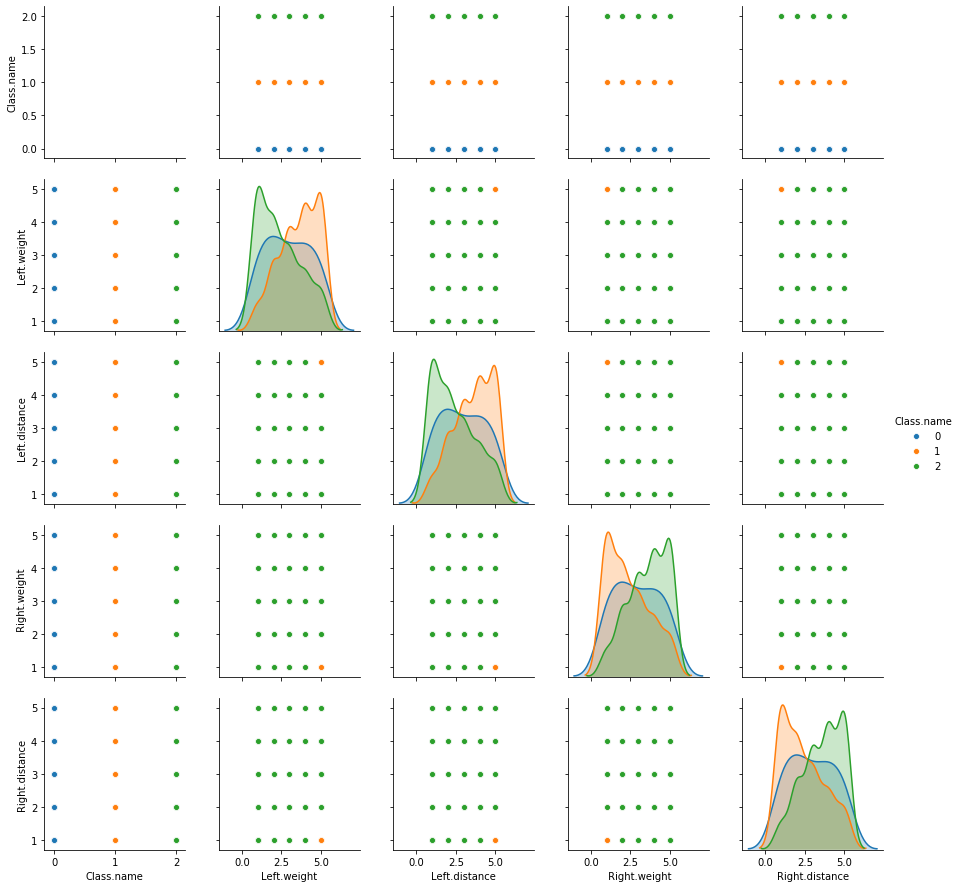

In [19]:
sns.pairplot(df,hue='Class.name')

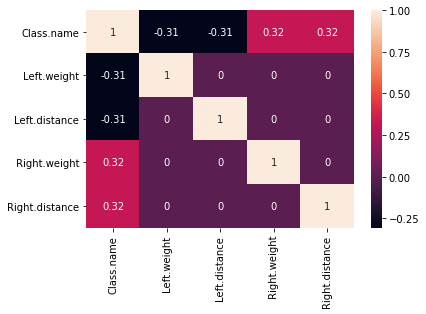

In [22]:
sns.heatmap(df.corr(),annot=True)

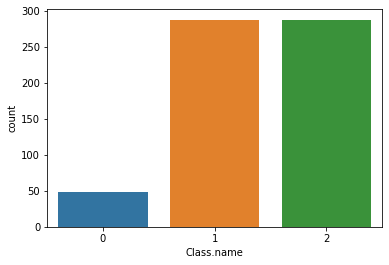

In [23]:
#plotting the count ofthe target data
sns.countplot(x='Class.name',data=df)

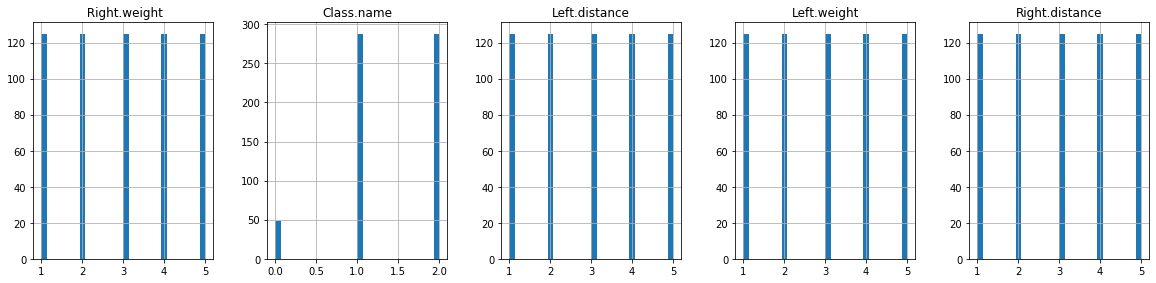

In [28]:
#checking skewness
df.hist(figsize=(20,10),grid=True,layout=(2,5),bins=30)
plt.show()

In [120]:
#choosing x and value
x=df.drop(['Class.name'],axis=1)
y=df['Class.name']

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [67]:
print(x.shape)
print(y.shape)

(625, 4)
(625,)


In [106]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 12)

In [107]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

90.57971014492753
[[ 0  3  1]
 [ 0 66  4]
 [ 0  5 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      0.94      0.92        70
           2       0.92      0.92      0.92        64

    accuracy                           0.91       138
   macro avg       0.60      0.62      0.61       138
weighted avg       0.88      0.91      0.89       138



In [108]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

76.08695652173914
[[ 0  1  3]
 [10 58  2]
 [12  5 47]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.91      0.83      0.87        70
           2       0.90      0.73      0.81        64

    accuracy                           0.76       138
   macro avg       0.60      0.52      0.56       138
weighted avg       0.88      0.76      0.81       138



In [109]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

81.15942028985508
[[ 0  2  2]
 [ 9 59  2]
 [ 7  4 53]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.91      0.84      0.87        70
           2       0.93      0.83      0.88        64

    accuracy                           0.81       138
   macro avg       0.61      0.56      0.58       138
weighted avg       0.89      0.81      0.85       138



In [163]:
rf = RandomForestClassifier(n_estimators=69)
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[ 0  4  0]
 [ 9 58  3]
 [ 5  3 56]]
82.6086956521739


In [111]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [112]:
svmkernel('rbf')

0.9492753623188406
[[ 0  0  4]
 [ 0 70  0]
 [ 0  3 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.96      1.00      0.98        70
           2       0.94      0.95      0.95        64

    accuracy                           0.95       138
   macro avg       0.63      0.65      0.64       138
weighted avg       0.92      0.95      0.94       138



In [113]:
svmkernel('poly')

0.9202898550724637
[[ 0  3  1]
 [ 0 67  3]
 [ 0  4 60]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.91      0.96      0.93        70
           2       0.94      0.94      0.94        64

    accuracy                           0.92       138
   macro avg       0.61      0.63      0.62       138
weighted avg       0.89      0.92      0.91       138



In [114]:
svmkernel('linear')

0.9202898550724637
[[ 4  0  0]
 [ 3 66  1]
 [ 6  1 57]]
              precision    recall  f1-score   support

           0       0.31      1.00      0.47         4
           1       0.99      0.94      0.96        70
           2       0.98      0.89      0.93        64

    accuracy                           0.92       138
   macro avg       0.76      0.94      0.79       138
weighted avg       0.96      0.92      0.94       138



In [115]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 12)

In [200]:
svc=SVC(kernel='rbf',probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9492753623188406
[[ 0  0  4]
 [ 0 70  0]
 [ 0  3 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.96      1.00      0.98        70
           2       0.94      0.95      0.95        64

    accuracy                           0.95       138
   macro avg       0.63      0.65      0.64       138
weighted avg       0.92      0.95      0.94       138



after the application of all algorithm SVC(kernel='rbf') has given the higher accuracy of 94.92%

In [203]:
from sklearn.externals import joblib

In [204]:
#saving the model as pickl
joblib.dump(svc,"Project 22_balance.pkl")

['Project 22_balance.pkl']

In [206]:
#loading the model
svc_from_joblib=joblib.load('Project 22_balance.pkl')

In [207]:
#using the model to make prediction
svc_from_joblib.predict(x_test)

array([1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1])